In [1]:
library(tidyverse)
library(ggplot2)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
set.seed(0)
num_trials <- 1000  # 模拟的总次数
sample_size <- 30  # 每次模拟的样本大小: 这里每次模拟抽取 30 个伯努利随机变量
q <- 0.3  # 伯努利随机变量的参数 事情发生概率

# df 包含一个名为 trial 的列, 列的值从 1 到 num_trials
df <- data.frame(trial = seq(num_trials))  

# rbinom() 用于生成伯努利样本, sample_size 是样本大小, 1 表示每个试验中事件只有两种可能的结果 (成功或失败), q 是成功的概率.
df <- mutate(df, simulation = map(.x=trial, .f=~rbinom(sample_size, 1, q)))  # map函数返回列表, 方便下方 mean() 计算
# print(df)

simulation_df <- mutate(df, sample_mean = map_dbl(.x=simulation, .f=mean))  # map_dbl函数返回双精度数值
print(simulation_df)

     trial
1        1
2        2
3        3
4        4
5        5
6        6
7        7
8        8
9        9
10      10
11      11
12      12
13      13
14      14
15      15
16      16
17      17
18      18
19      19
20      20
21      21
22      22
23      23
24      24
25      25
26      26
27      27
28      28
29      29
30      30
31      31
32      32
33      33
34      34
35      35
36      36
37      37
38      38
39      39
40      40
41      41
42      42
43      43
44      44
45      45
46      46
47      47
48      48
49      49
50      50
51      51
52      52
53      53
54      54
55      55
56      56
57      57
58      58
59      59
60      60
61      61
62      62
63      63
64      64
65      65
66      66
67      67
68      68
69      69
70      70
71      71
72      72
73      73
74      74
75      75
76      76
77      77
78      78
79      79
80      80
81      81
82      82
83      83
84      84
85      85
86      86
87      87
88      88
89      89
90      90

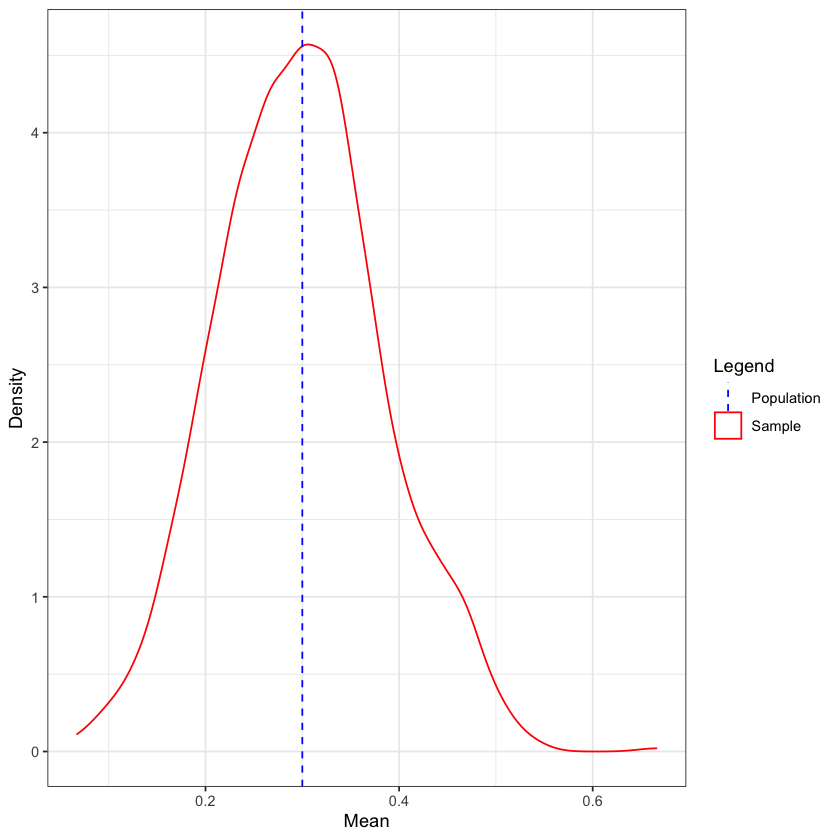

In [3]:
# 样本均值的分布会随着样本量的增加而逐渐接近正态分布
plot_obj <- ggplot() +  # 创建一个对象
            labs(x="Mean", y="Density") +  # 标签
            theme_bw() +  # 主题
            geom_density(data=simulation_df, aes(x=sample_mean, color="Sample", linetype="Sample"))  # 绘制密度图 设置Sample名字

plot_obj <- plot_obj + geom_vline(aes(xintercept=q, color="Population", linetype="Population"))  # 总体均值垂直线 设置Population名字
 
plot_obj <- plot_obj + 
            scale_color_manual(name = "Legend", values=c("Sample"="red", "Population"="blue")) +
            scale_linetype_manual(name="Legend", values=c("Sample"="solid", "Population"="dashed"))  # Legend

print(plot_obj)

In [4]:
set.seed(0)  
num_trials_per_sample_size <- 10  # 每个样本大小 重复进行 的 试验次数
max_sample_size <- 10000  # 最大样本大小
q <- 0.3 

# 使用 crossing() 返回DataFrame, 生成所有样本大小和试验次数的组合
df <- crossing(
    trial = seq(1: num_trials_per_sample_size),
    sample_size = seq(to = sqrt(max_sample_size), by = 0.1) ** 2  # 非线性
)

# 使用 pmap() 对每对(trial, sample_size)进行模拟
# 控制了运行的次数
df <- mutate(df, simulation = pmap(.l = list(trial, sample_size), .f = ~rbinom(.y, 1, q)))  # .y 实际上是 sample size

# 计算每个序列的样本均值
sim_by_n_df <- mutate(df, sample_mean = map_dbl(.x = simulation, .f = mean))

print(sim_by_n_df)
print(tail(sim_by_n_df))

# A tibble: 9,910 × 4
   trial sample_size simulation sample_mean
   <int>       <dbl> <list>           <dbl>
 1     1        1    <int [1]>        1    
 2     1        1.21 <int [1]>        0    
 3     1        1.44 <int [1]>        0    
 4     1        1.69 <int [1]>        0    
 5     1        1.96 <int [1]>        1    
 6     1        2.25 <int [2]>        0.5  
 7     1        2.56 <int [2]>        0.5  
 8     1        2.89 <int [2]>        0    
 9     1        3.24 <int [3]>        0    
10     1        3.61 <int [3]>        0.333
# ℹ 9,900 more rows
# A tibble: 6 × 4
  trial sample_size simulation     sample_mean
  <int>       <dbl> <list>               <dbl>
1    10       9900. <int [9,900]>        0.295
2    10       9920. <int [9,920]>        0.296
3    10       9940. <int [9,940]>        0.300
4    10       9960. <int [9,960]>        0.299
5    10       9980. <int [9,980]>        0.291
6    10      10000  <int [10,000]>       0.290


Warning message in geom_point(data = sim_by_n_df, aes(x = sample_size, y = sample_mean, :
“Ignoring unknown aesthetics: linetype”
Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


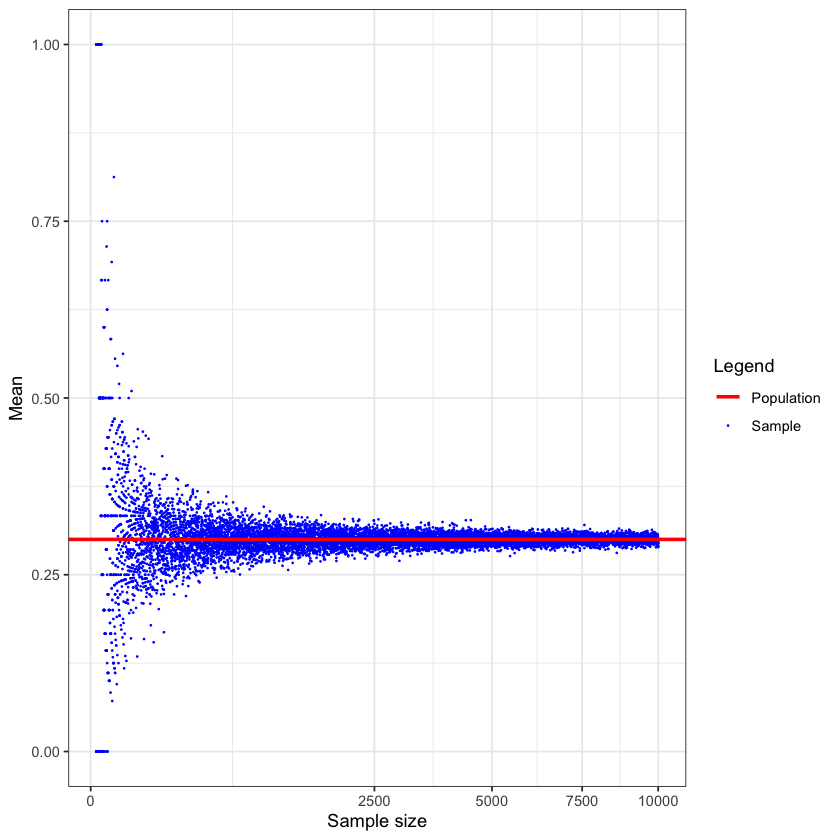

In [5]:
plot_obj <- ggplot() + labs(x="Sample size", y="Mean") + theme_bw() +
    geom_point(data=sim_by_n_df, aes(x=sample_size, y=sample_mean, color="Sample", linetype="Sample"), size=0.1)

plot_obj <- plot_obj + geom_hline(aes(yintercept=q, color="Population", linetype="Population"), size=1)

plot_obj + scale_color_manual(name = "Legend", values=c("Sample"="blue", "Population"="red")) +
    scale_linetype_manual(name="Legend", values=c("Sample"="dashed", "Population"="solid")) +
    scale_x_sqrt()

In [6]:
set.seed(0)
num_trials <- 1000
sample_size <- 30

mu <- 1  # 真实的均值
sigma_sqr <- 3  # 真实的方差

df <- data.frame(trial=seq(num_trials))

# 生成 num_trials 个样本, 每个样本由 sample_size 个独立同分布的正态随机变量组成
df <- mutate(df, simulation=map(.x=trial, .f=~rnorm(sample_size, mean=mu, sd=sqrt(sigma_sqr))))

simulation_df <- mutate(df, sample_var=map_dbl(.x=simulation, .f=var))
print(simulation_df)

     trial
1        1
2        2
3        3
4        4
5        5
6        6
7        7
8        8
9        9
10      10
11      11
12      12
13      13
14      14
15      15
16      16
17      17
18      18
19      19
20      20
21      21
22      22
23      23
24      24
25      25
26      26
27      27
28      28
29      29
30      30
31      31
32      32
33      33
34      34
35      35
36      36
37      37
38      38
39      39
40      40
41      41
42      42
43      43
44      44
45      45
46      46
47      47
48      48
49      49
50      50
51      51
52      52
53      53
54      54
55      55
56      56
57      57
58      58
59      59
60      60
61      61
62      62
63      63
64      64
65      65
66      66
67      67
68      68
69      69
70      70
71      71
72      72
73      73
74      74
75      75
76      76
77      77
78      78
79      79
80      80
81      81
82      82
83      83
84      84
85      85
86      86
87      87
88      88
89      89
90      90

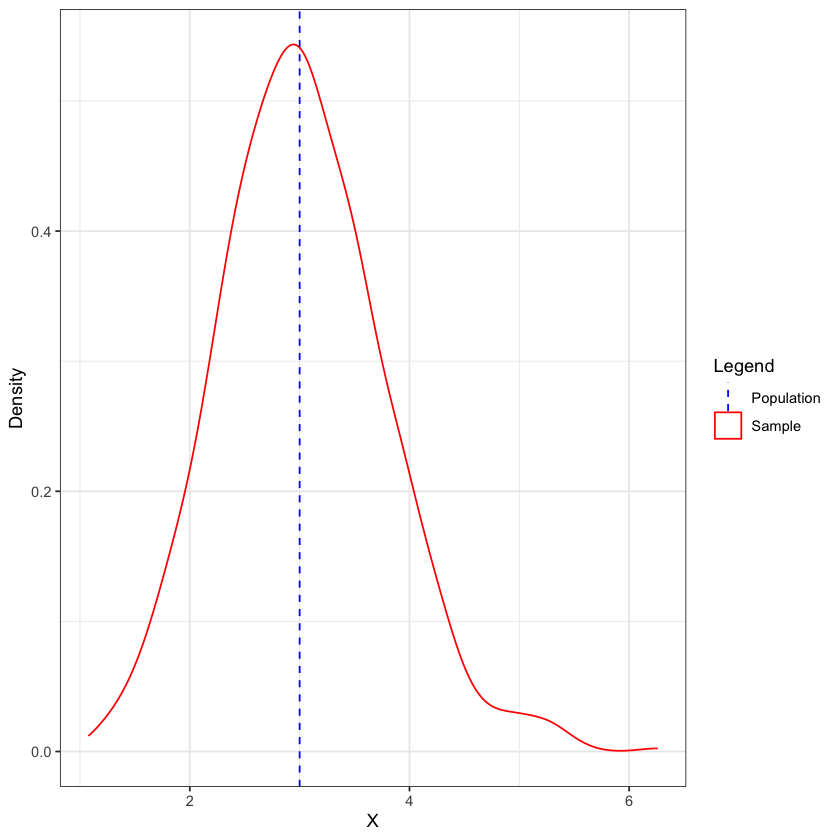

In [7]:
plot_obj <- ggplot() + 
    labs(x="X", y="Density") + 
    theme_bw() + 
    geom_density(data=simulation_df, aes(x=sample_var, color="Sample", linetype="Sample"))

plot_obj <- plot_obj + 
    geom_vline(aes(xintercept=sigma_sqr, color="Population", linetype="Population"))

plot_obj + scale_color_manual(name="Legend", 
                              values=c("Sample"="red", "Population"="blue")) + 
    scale_linetype_manual(name="Legend", 
                          values=c("Sample"="solid", "Population"="dashed"))

Warning message in geom_point(data = sim_by_n_df, aes(x = sample_size, y = sample_var, :
“Ignoring unknown aesthetics: linetype”
Warning message:
“Removed 50 rows containing missing values or values outside the scale range
(`geom_point()`).”


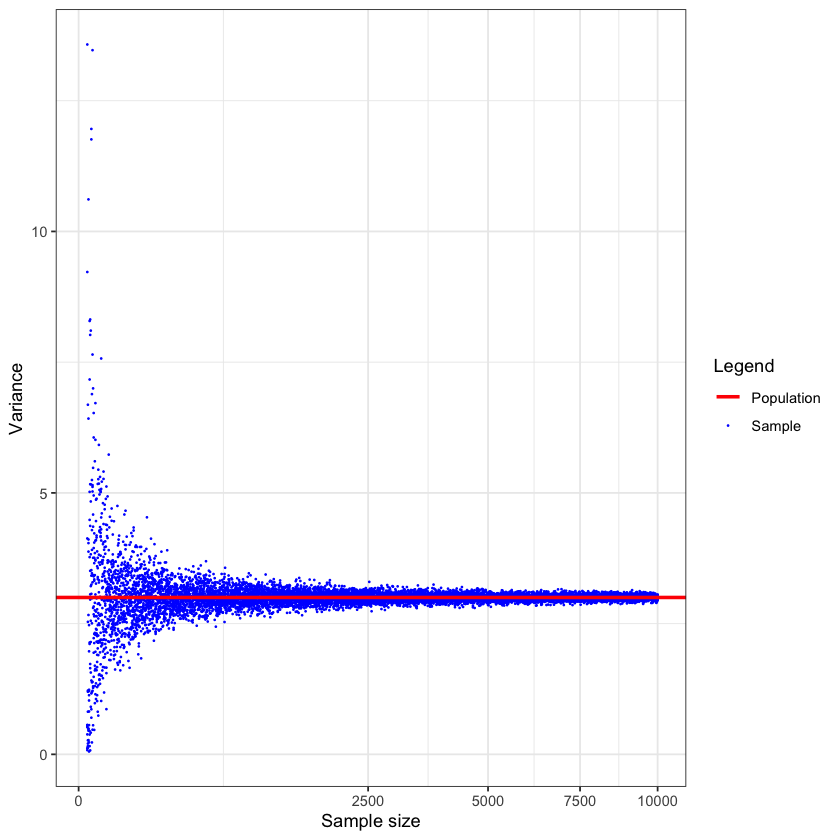

In [8]:
set.seed(0)
num_trials_per_sample_size <- 10
max_sample_size <- 10000
mu <- 1
sigma_sqr <- 3

df <- crossing(trial=seq(1: num_trials_per_sample_size),
    sample_size=seq(to=sqrt(max_sample_size), by=0.1)**2)

# 为每一对样本大小和试验编号模拟一系列高斯随机变量
df <- mutate(df, simulation=pmap(.l=list(trial, sample_size),
                                 .f=~rnorm(.y, mean=mu, sd=sqrt(sigma_sqr))))

# 为每一系列数据计算样本方差
sim_by_n_df <- mutate(df, sample_var=map_dbl(.x=simulation, .f=var))

plot_obj <- ggplot() + 
    labs(x="Sample size", y="Variance") + 
    theme_bw() + 
    geom_point(data=sim_by_n_df, aes(x=sample_size, y=sample_var, color="Sample", linetype="Sample"), size=0.1)

plot_obj <- plot_obj + geom_hline(aes(yintercept=sigma_sqr, color="Population", linetype="Population"), size=1)

plot_obj + scale_color_manual(name="Legend", values=c("Sample"="blue", "Population"="red")) +
    scale_linetype_manual(name="Legend", values=c("Sample"="dashed", "Population"="solid")) +
    scale_x_sqrt()

In [9]:
set.seed(0)
num_trials_per_sample_size <- 10
max_sample_size <- 10000
theta <- 1
df <- crossing(trial=seq(num_trials_per_sample_size),
               sample_size=seq(to=sqrt(max_sample_size), by=0.1)**2)

# 为每一对样本大小和试验编号模拟一系列柯西随机变量
df <- mutate(df, simulation=pmap(.l=list(trial, sample_size), .f=~rcauchy(.y, location=theta)))

sim_by_n_df <- mutate(df, sample_mean=map_dbl(.x=simulation, .f=mean))  # MEAN

In [10]:
set.seed(0)
num_trials_per_sample_size <- 10
max_sample_size <- 10000
theta <- 1

df <- crossing(trial=seq(num_trials_per_sample_size),
               sample_size=seq(to=sqrt(max_sample_size), by=0.1)**2)

df <- mutate(df, simulation=pmap(.l=list(trial,sample_size), .f=~rcauchy( .y, location=theta)) )

sim_by_n_df <- mutate(df, sample_median=map_dbl(.x=simulation, .f=median))  # MEDIAN

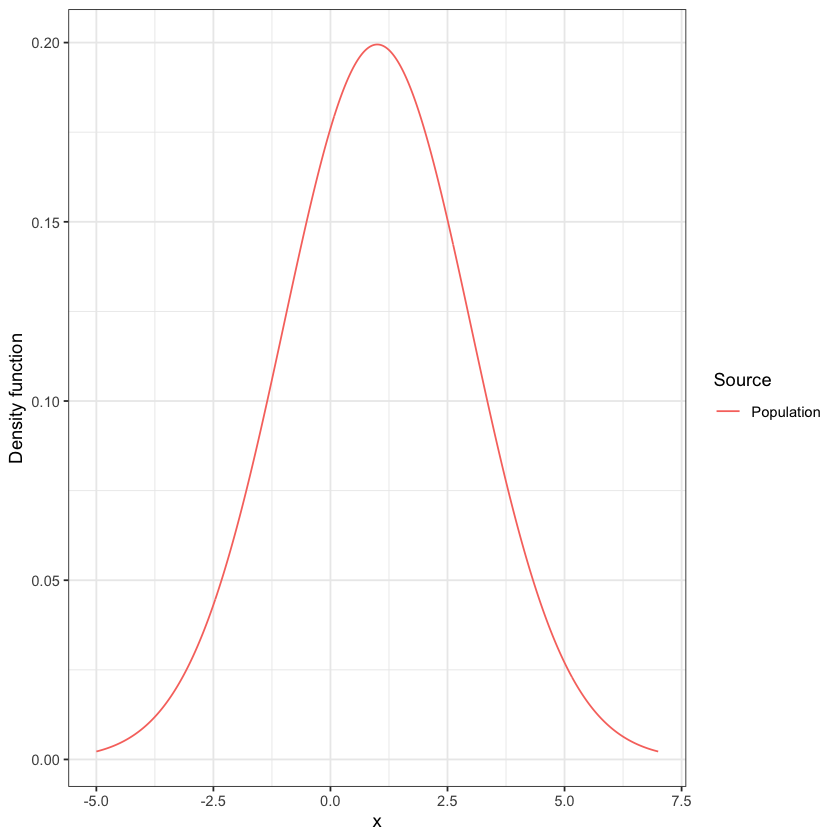

In [11]:
mu <- 1  # 均值 μ
sigma <- 2  # 标准差 σ

# 生成一系列 x 值, 范围从 (μ-3σ) 到 (μ+3σ), 间隔为标准差的 0.01 倍
x <- seq(mu - 3*sigma, mu + 3*sigma, by = sigma * 0.01)

# 计算对应 x 值的高斯密度
df_gaussian <- data.frame(
    x = x,
    Density = dnorm(x, mean = mu, sd = sigma),  # 使用dnorm函数计算 正态分布密度
    Source = "Population"                        # 添加数据源标签，用于图例
)
# print(df_gaussian)
# 使用 ggplot2 包绘制密度函数图
ggplot(df_gaussian, aes(x = x, y = Density, color = Source)) +
    geom_line() +  # 绘制线图
    ylab("Density function") +  # y轴标签
    theme_bw()  # 使用黑白主题

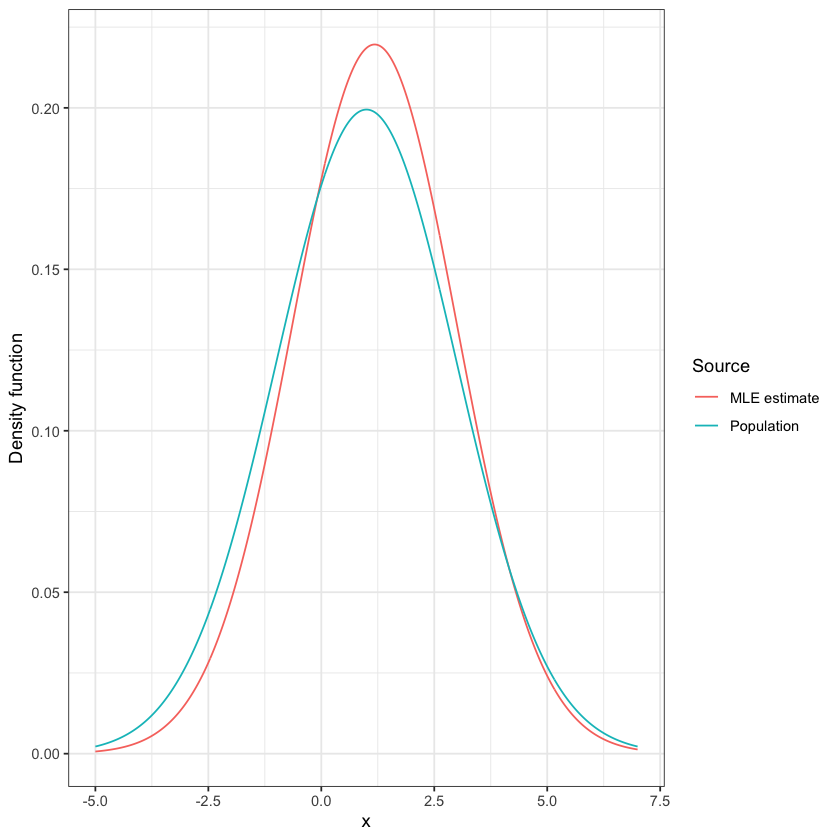

In [12]:
set.seed(123)
sample_size <- 100
mu <- 1
sigma <- 2

# 生成指定数量 (sample_size) 的随机样本
sample_data <- rnorm(sample_size, mu, sigma)

# 计算均值和标准差的最大似然估计
mu_mle <- mean(sample_data)
# 样本标准差调整后的值, 考虑到最大似然估计的有偏性, 通过乘以 sqrt((sample_size - 1) / sample_size) 进行校正, 使其接近无偏估计
sigma_mle <- sd(sample_data) * sqrt((sample_size - 1) / sample_size)

# 生成用于绘图的数据点
x <- seq(mu - 3*sigma, mu + 3*sigma, by = sigma * 0.01)
df_gaussian <- data.frame(
    x = x,
    Density = dnorm(x, mean = mu, sd = sigma),
    Source = "Population"
)

# 将估计的密度函数添加到数据框中
df_estimate <- data.frame(
    x = x,
    Density = dnorm(x, mean = mu_mle, sd = sigma_mle),
    Source = "MLE estimate"
)
df_gaussian <- rbind(df_gaussian, df_estimate)

# 使用 ggplot2 绘制真实密度和估计密度的对比图
library(ggplot2)
ggplot(df_gaussian, aes(x = x, y = Density, color = Source)) +
    geom_line() +
    ylab("Density function") +
    theme_bw()

Warning message:
“Removed 1 row containing non-finite outside the scale range (`stat_density()`).”


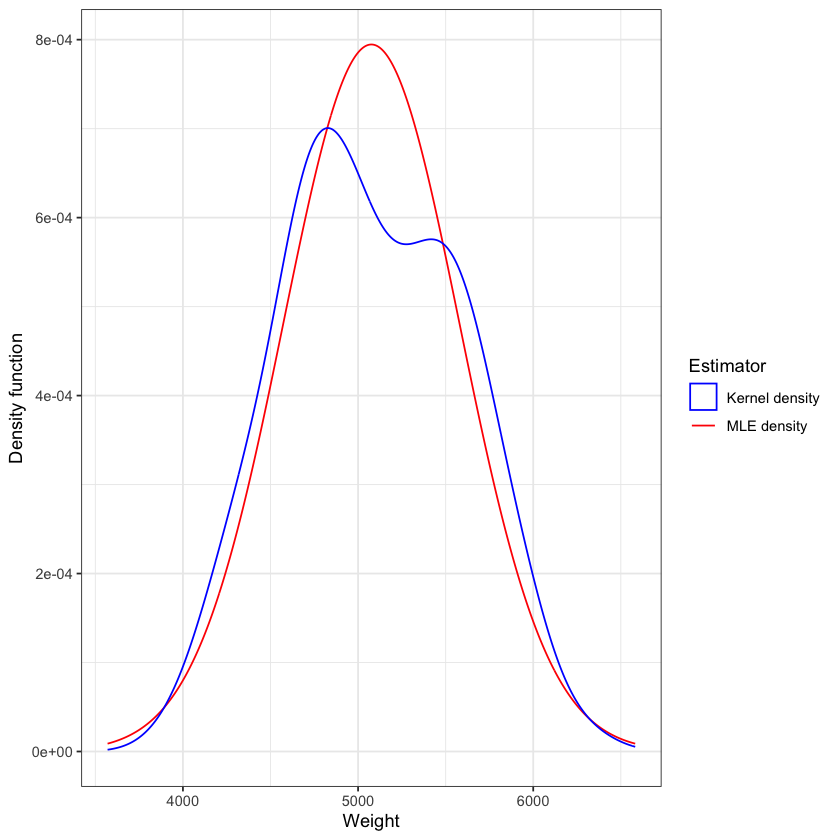

In [13]:
library(palmerpenguins)
library(ggplot2)
library(dplyr)

# 提取特定物种的体重数据
gentoo_weights <- penguins %>%
    filter(species == "Gentoo") %>%
    pull(body_mass_g)  # 从数据框中提取体重列

# 计算体重的最大似然估计的均值和标准差
n <- length(gentoo_weights)  # 样本大小
mu_mle <- mean(gentoo_weights, na.rm = TRUE)  # 均值
sigma_mle <- sd(gentoo_weights, na.rm = TRUE) * sqrt((n-1)/n)  # 调整的标准差

# 生成体重的估计密度数据
weights <- seq(mu_mle - 3*sigma_mle, mu_mle + 3*sigma_mle, by = sigma_mle * 0.01)
estimated_density <- data.frame(
    Weight = weights,
    Density = dnorm(weights, mean = mu_mle, sd = sigma_mle),
    Source = "MLE density"
)

# 创建绘图对象并绘制估计的密度函数
plot_obj <- ggplot() +
    geom_line(data = estimated_density, aes(x = Weight, y = Density, color = "MLE density")) +
    ylab("Density function") + theme_bw()

# 添加实际数据的 "核密度估计图"
colors <- c("MLE density" = "red", "Kernel density" = "blue")
plot_obj <- plot_obj + 
    # 这是 ggplot2 包中用于生成核密度估计的函数, 核密度估计是一种非参数方式, 用于估计随机变量的概率密度函数
    geom_density(data = as_tibble(gentoo_weights), aes(x = gentoo_weights, color = "Kernel density")) +
    scale_color_manual(values = colors) +
    labs(y = "Density function", color = "Estimator")

# 打印绘图对象
print(plot_obj)

In [14]:
set.seed(0)
sample_size <- 100
theta_0 <- 5

cauchy_sample <- rcauchy(n = sample_size, location = theta_0)

# 定义对数似然函数
log_lik_cauchy <- function(theta, sample_X) {
    return(-sum(log(1 + (sample_X - theta)^2)))
}

# 将对数似然函数包装为一个单变量函数
log_lik_cauchy_X <- function(theta) {
    return(log_lik_cauchy(theta, cauchy_sample))
}

# 使用优 化函数 optimise() 求解对数似然函数的最大值
# optimise() 的要求是被优化的函数必须是单变量的
# 搜索参数 theta 的区间 (通过 interval 参数)
# maximum = TRUE 是在寻找最大值，适应最大似然估计的需求
# 最后 optimise() 函数返回一个列表, 其中包含了估计的最优 theta 值 (在 $maximum 属性中)
theta_ml_est <- optimise(f = log_lik_cauchy_X, interval = c(-1000, 1000), maximum = TRUE)$maximum

# 输出估计的 theta 值
theta_ml_est

[1] 4.906282

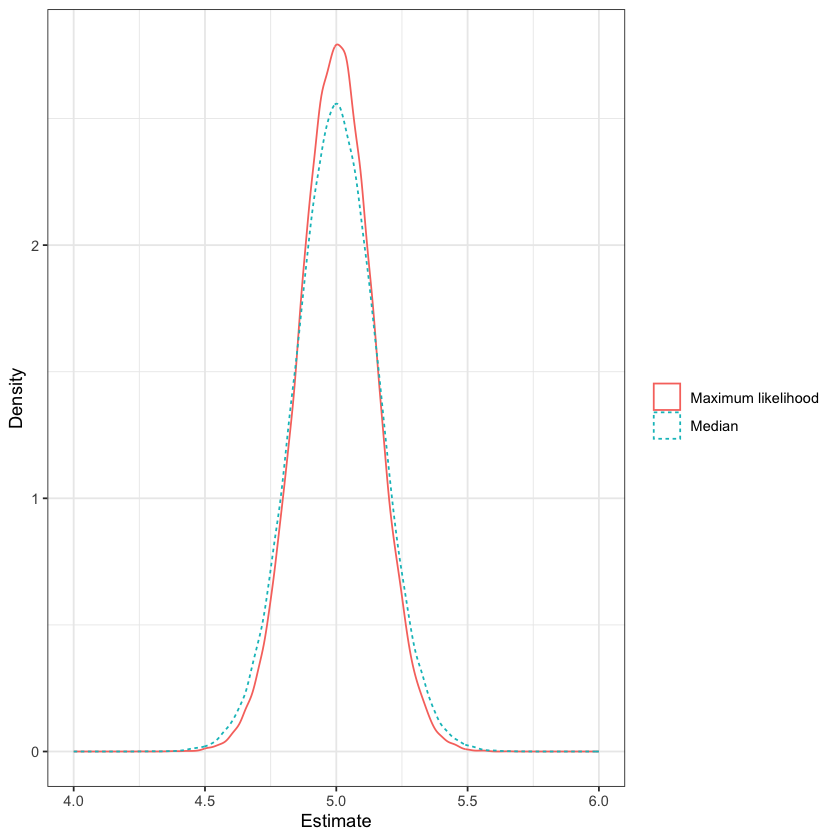

In [15]:
set.seed(0)
num_trials <- 100000
sample_size <- 100
theta_0 <- 5  


log_lik_cauchy <- function(theta, sample_X) {
    return(-sum(log(1 + (sample_X - theta)^2)))
}


theta_ml <- function(sample_X) {
    log_lik_cauchy_X <- function(theta) {
        return(log_lik_cauchy(theta, sample_X))
    }
    theta_ml_est <- optimise(f = log_lik_cauchy_X, interval = c(-10, 18), maximum = TRUE)$maximum
    return(theta_ml_est)
}

# 生成模拟数据
df <- data.frame(trial = seq(num_trials)) %>%
    mutate(sample = map(.x = trial, ~rcauchy(sample_size, location = theta_0)))

# 计算每个样本的最大似然估计和中位数估计
cauchy_simulation_df <- mutate(df, 
    ml_est = map_dbl(.x = sample, .f = theta_ml),
    med_est = map_dbl(.x = sample, .f = median))

# 数据长格式转换
plot_df <- cauchy_simulation_df %>%
    pivot_longer(cols = c(ml_est, med_est)) %>%
    mutate(name = map_chr(.x = name, 
                        ~case_when(
                          .x == "med_est" ~ "Median",
                          .x == "ml_est" ~ "Maximum likelihood"
                        )))

# 绘制密度图
ggplot(plot_df, aes(x = value, color = name, linetype = name)) +
    geom_density() +
    theme_bw() +
    xlim(c(4, 6)) +
    labs(color = "", linetype = "") +
    xlab("Estimate") +
    ylab("Density")

In [16]:
# 定义均方误差计算函数
msefunc <- function(x) { return(mean((x - theta_0)^2)) }

# 计算中位数估计的均方误差
med_estimate_mean_sqr_error <- cauchy_simulation_df %>%
    pull(med_est) %>%
    msefunc

# 输出中位数估计的均方误差
med_estimate_mean_sqr_error

# 计算最大似然估计的均方误差
ml_estimate_mean_sqr_error <- cauchy_simulation_df %>%
    pull(ml_est) %>%
    msefunc

# 输出最大似然估计的均方误差
ml_estimate_mean_sqr_error


[1] 0.02533741

[1] 0.02062467

In [17]:
alpha <- 0.05  # 5%
n <- 80
t = qt(1-alpha/2, df=n-1)  # quantile function for t distribution
t

[1] 1.99045

Warning message:
“Removed 1 row containing non-finite outside the scale range (`stat_density()`).”


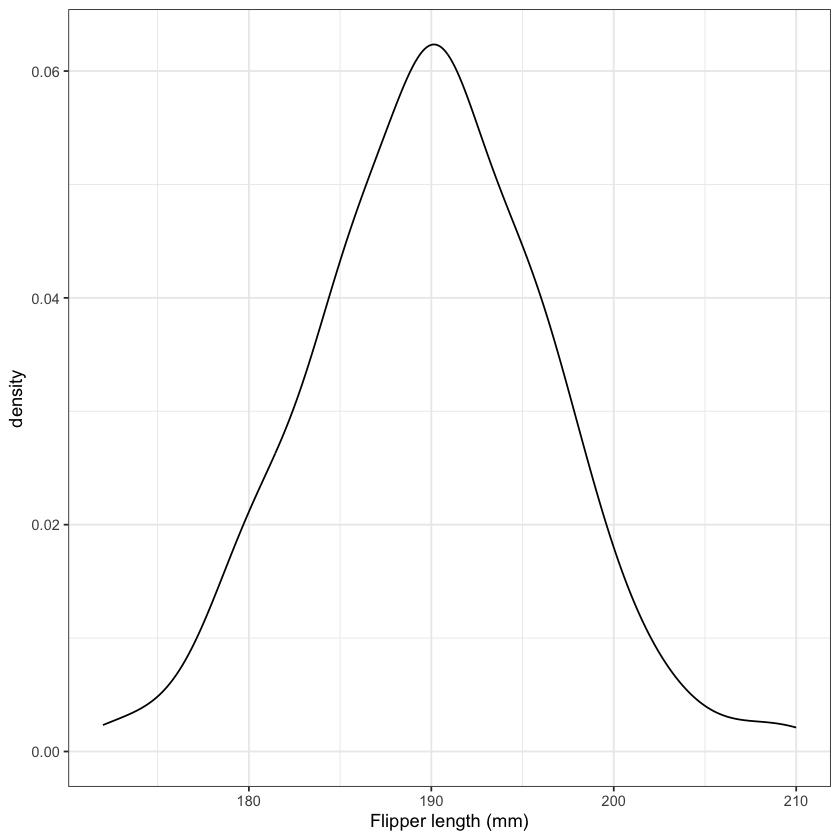

In [18]:
ggplot(data=filter(penguins, species=="Adelie"), aes(x=flipper_length_mm)) +
    geom_density() + theme_bw() +
    xlab("Flipper length (mm)")

Warning message:
“Removed 1 row containing non-finite outside the scale range (`stat_qq()`).”
Warning message:
“Removed 1 row containing non-finite outside the scale range (`stat_qq_line()`).”


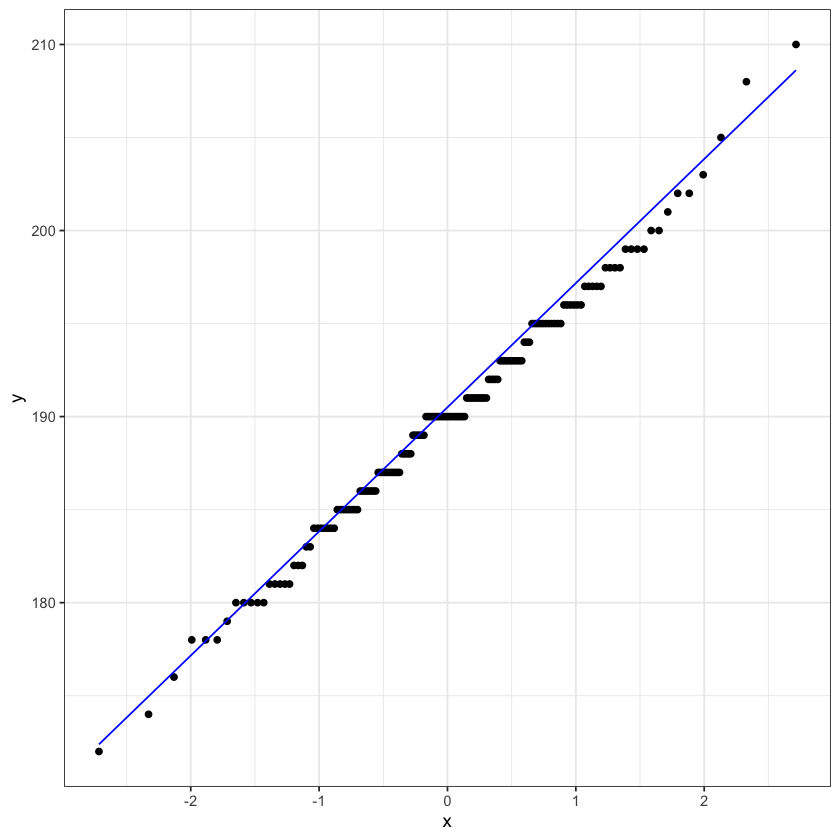

In [19]:
ggplot(data=filter(penguins, species=="Adelie"), aes(sample=flipper_length_mm)) +
    theme_bw() +
    stat_qq() +
    stat_qq_line(color="blue")

In [20]:
library(PropCIs)  # 提供计算置信区间的函数

driving_test_results <- c(1,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,1,0,1,0)
mean(driving_test_results)  # 计算平均值 (成功的比例)

alpha <- 0.05  # 置信水平的补数, 这里表示95%的置信区间

num_successes <- sum(driving_test_results)  # 相加 也就是 成功的总次数
# print(num_successes)  # 9
sample_size <- length(driving_test_results)  # 样本大小
# print(sample_size)  # 23
    
scoreci(x=num_successes, n=sample_size, conf.level=1-alpha)

[1] 0.3913043




data:  

95 percent confidence interval:
 0.2216 0.5921


In [25]:
library(boot) # load the library

set.seed(123) # set random seed
geyser <- faithful # the volcano data set
dim(geyser)
head(geyser, 5)
# 1. define a function which computes the median of a column of interest
compute_median <- function(df, indicies, col_name) {
    sub_sample <- slice(df, indicies) %>% pull(all_of(col_name)) # extract subsample
    return(median(sub_sample, na.rm=TRUE)) # return median
}

# 2. use the boot function to generate the bootstrap statistics
results <- boot(data=geyser, statistic=compute_median, col_name="eruptions", R=10000)

# 3. compute the 99% confidence interval for the median
boot.ci(boot.out = results, type = "basic", conf=0.99)

[1] 272   2

,eruptions,waiting
,<dbl>,<dbl>
1,3.600,79
2,1.800,54
3,3.333,74
4,2.283,62
5,4.533,85


BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 10000 bootstrap replicates

CALL : 
boot.ci(boot.out = results, conf = 0.99, type = "basic")

Intervals : 
Level      Basic         
99%   ( 3.858,  4.266 )  
Calculations and Intervals on Original Scale